In [1]:
import scanpy as sc

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot.plotting as mpl
import pandas as pd
import os
import muon

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)
                         
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

['default', 'despine']


In [2]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

In [3]:
adata = mudata["rna"]
adata.obsm["X_umap"] = mudata.obsm["X_umap"]

In [4]:
endocrine_celltypes = ['Alpha', 'Beta', 'Delta', 'Eps. progenitors', 'Epsilon',
       'Fev+', 'Fev+ Alpha', 'Fev+ Beta', 'Fev+ Delta', 'Ngn3 high', 'Ngn3 high cycling', 'Ngn3 low']

In [5]:
adata = adata[adata.obs["cell_type"].isin((endocrine_celltypes))]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


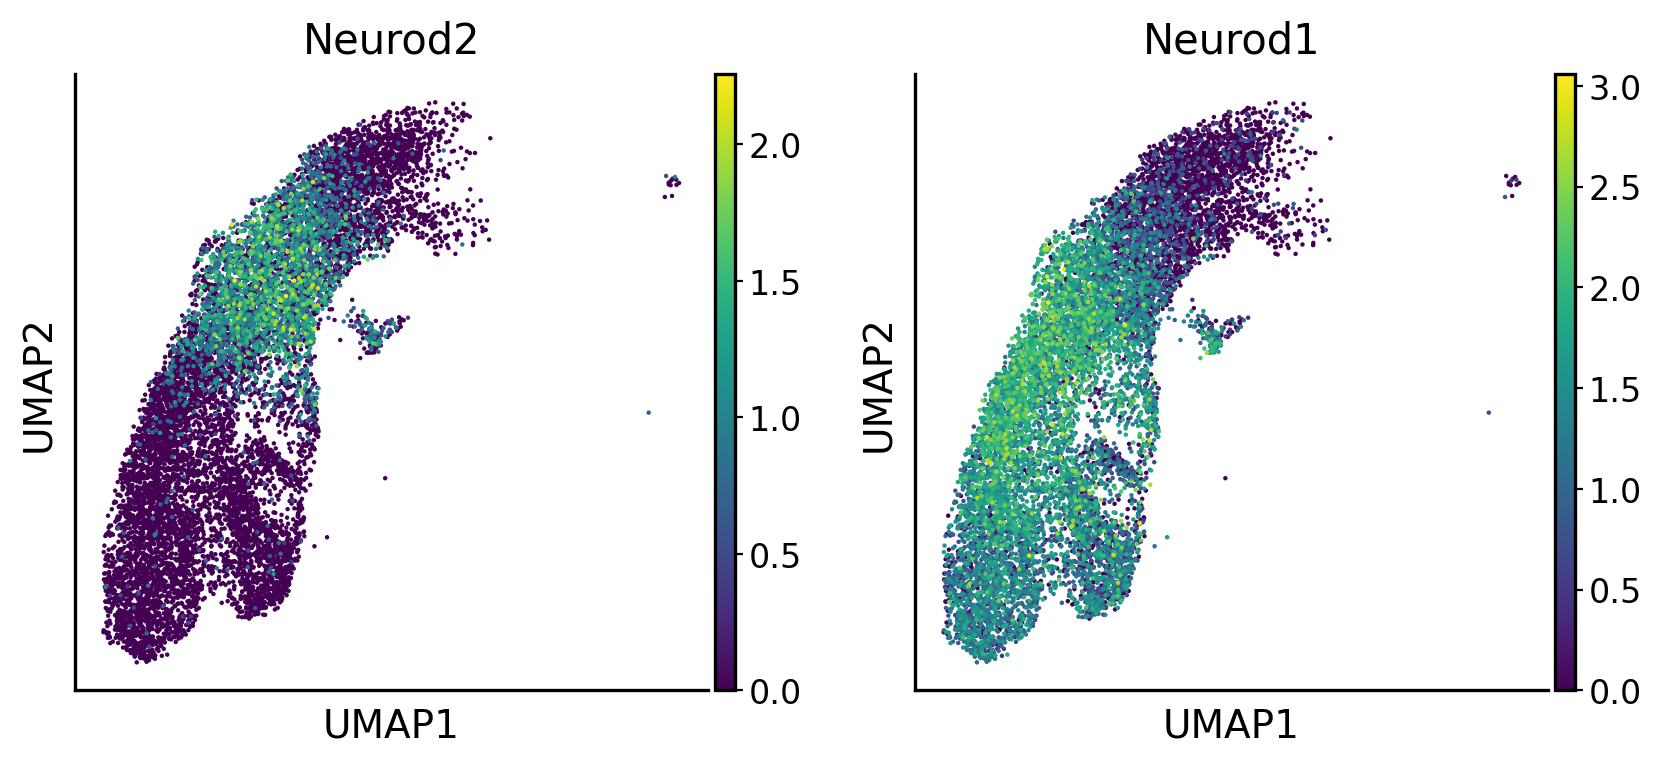

In [7]:
sc.pl.umap(adata, color=["Neurod2", "Neurod1"])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


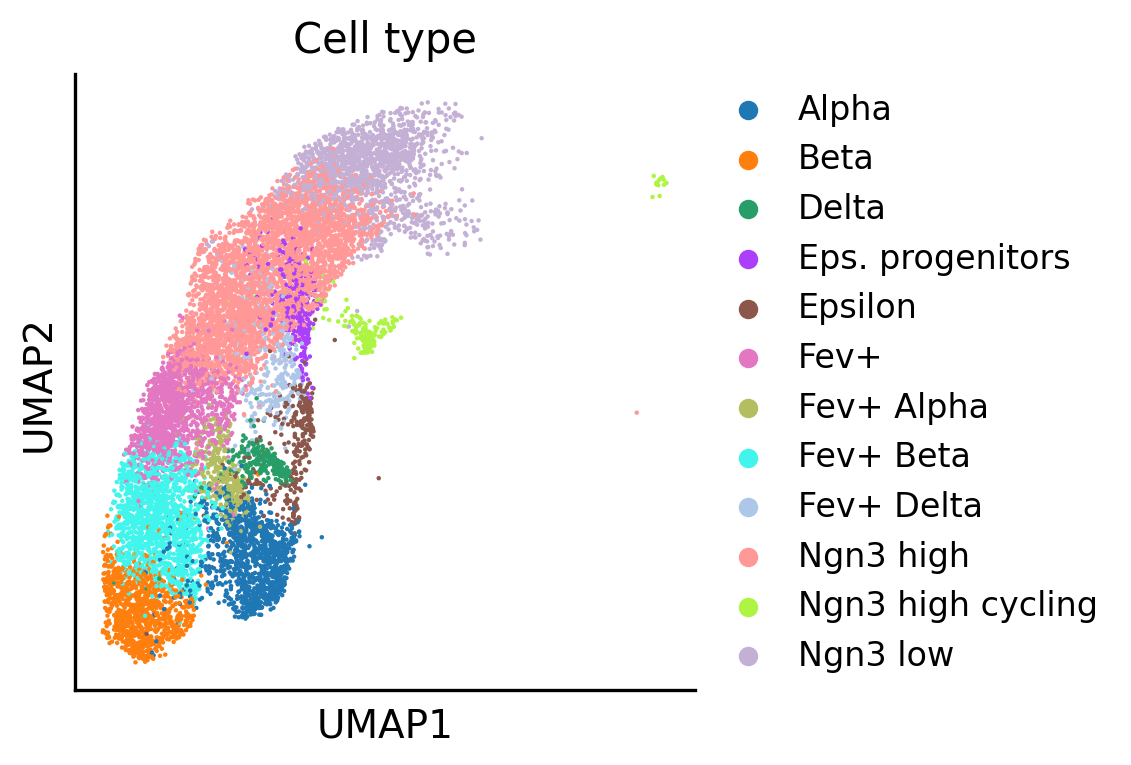

In [8]:
sc.pl.umap(adata, color=["cell_type"], title="Cell type")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

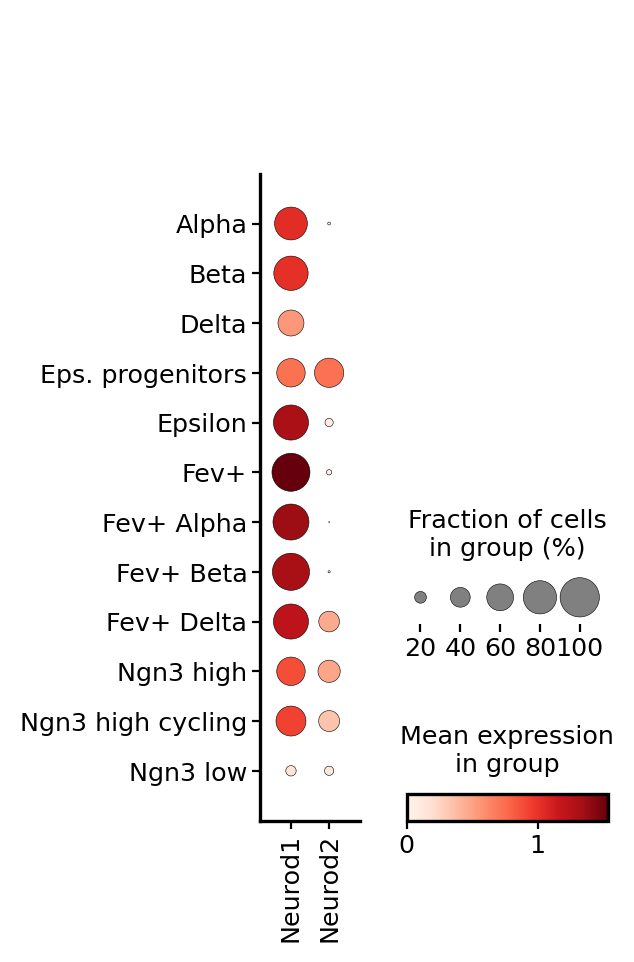

In [9]:
sc.pl.dotplot(adata[adata.obs["stage_num"]==14.5], ["Neurod1", "Neurod2"], groupby='cell_type')

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

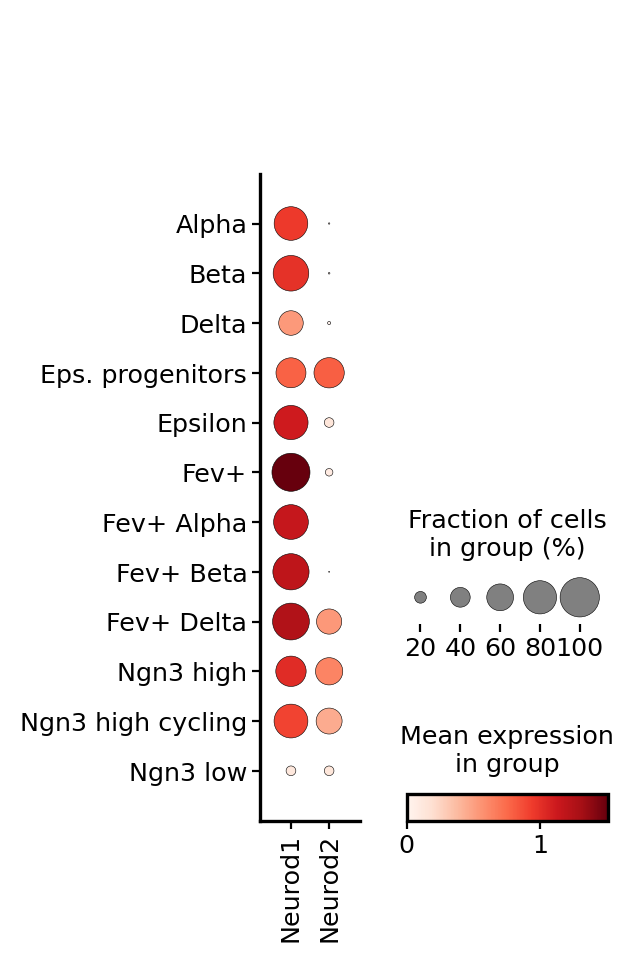

In [10]:
sc.pl.dotplot(adata[adata.obs["stage_num"]==15.5], ["Neurod1", "Neurod2"], groupby='cell_type')

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

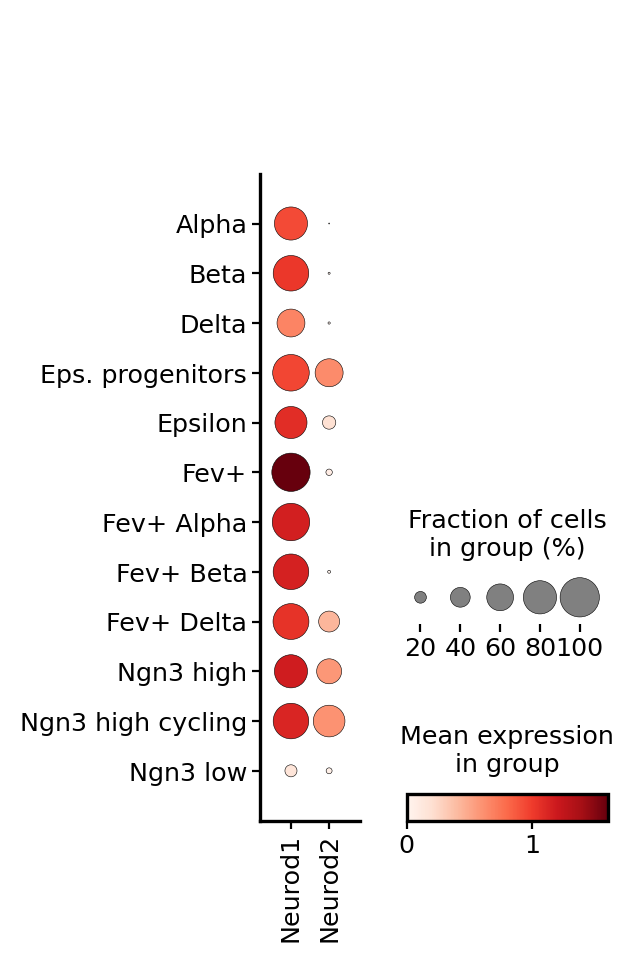

In [11]:
sc.pl.dotplot(adata[adata.obs["stage_num"]==16.5], ["Neurod1", "Neurod2"], groupby='cell_type')

In [12]:
bdata =sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [13]:
bdata.obs["cell_type"] = bdata.obs["clusters_fig6_fine_final"].copy()

In [14]:
endocrine_cells = ["Alpha", "Beta", "Epsilon", "Delta", "Fev+ Epsilon", "Fev+ Delta", "Fev+ Pyy", "Fev+ Alpha", "Fev+ Beta", "Ngn3 High early", "Ngn3 High late", "Ngn3 low EP"]
bdata = bdata[bdata.obs["cell_type"].isin(endocrine_cells)]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [15]:
bdata = bdata[bdata.obs["day"].isin(("12.5", "13.5"))]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [16]:
order_celltypes = ["Alpha", "Beta", "Delta", "Fev+ Epsilon", "Epsilon", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Fev+ Pyy", "Ngn3 High early", "Ngn3 High late", "Ngn3 low EP"]


In [17]:
color_dict = {'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Fev+ Epsilon': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8',
        'Ngn3 High early': '#ff9896', 'Ngn3 High late': '#ff9896', 'Ngn3 High early':'#f0b98d', 'Ngn3 low EP': '#c5b0d5', 'Fev+ Pyy': '#f5cb42',
}

In [18]:
bdata.obs["cell_type"] = bdata.obs["cell_type"].astype("category")
bdata.uns["cell_type_colors"] = [color_dict[ct] for ct in bdata.obs["cell_type"].cat.categories]

/tmp/ipykernel_1287276/1552276478.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bdata.obs["cell_type"] = bdata.obs["cell_type"].astype("category")


In [19]:
sc.pp.normalize_total(bdata)
sc.pp.log1p(bdata)
sc.pp.pca(bdata)

In [20]:
sc.pp.neighbors(bdata)
sc.tl.umap(bdata)


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


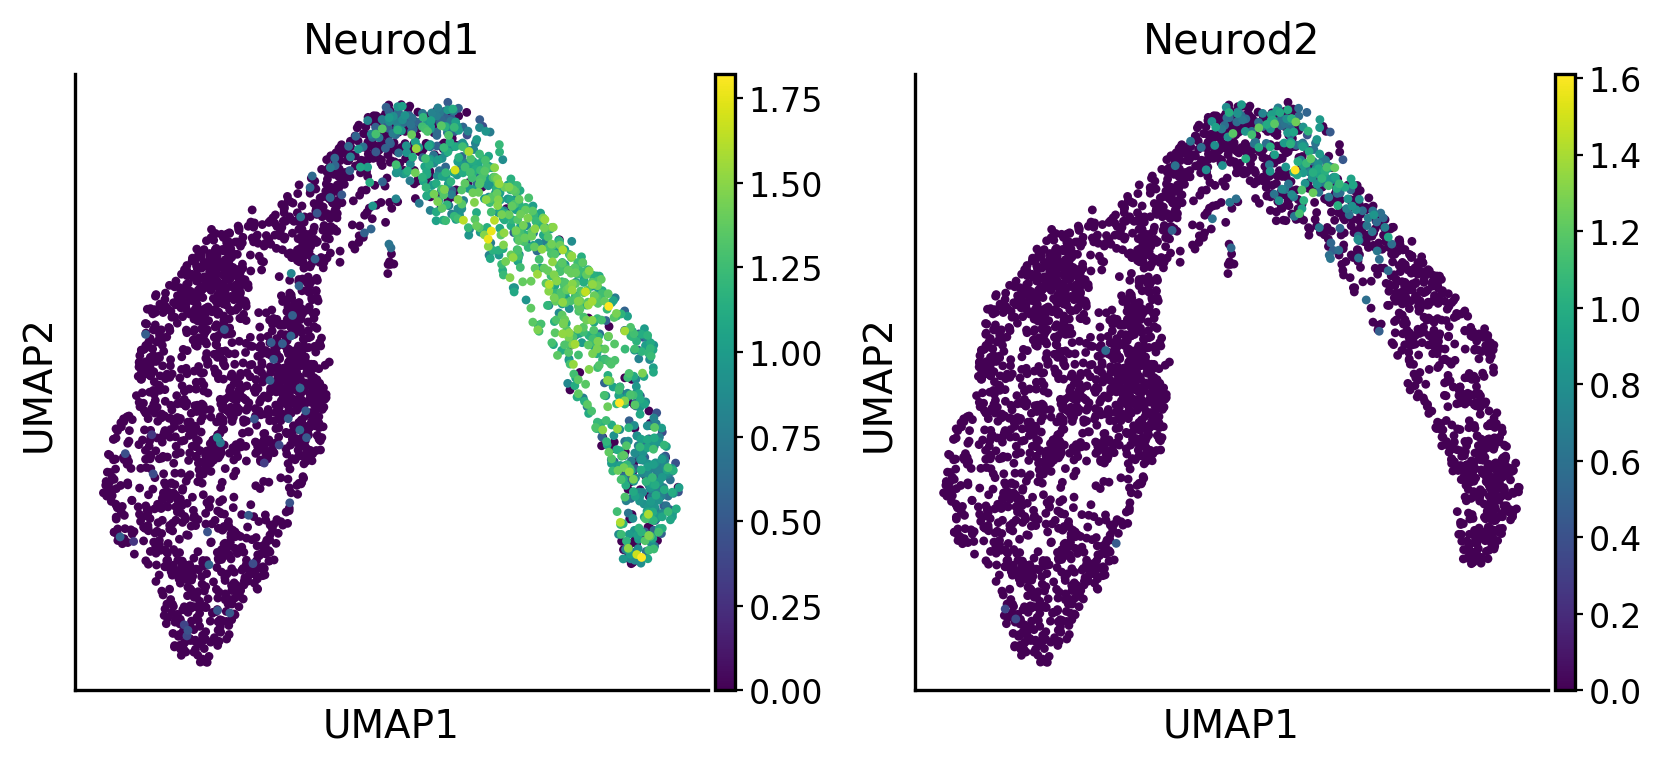

In [21]:
sc.pl.umap(bdata, color=["Neurod1", "Neurod2"])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


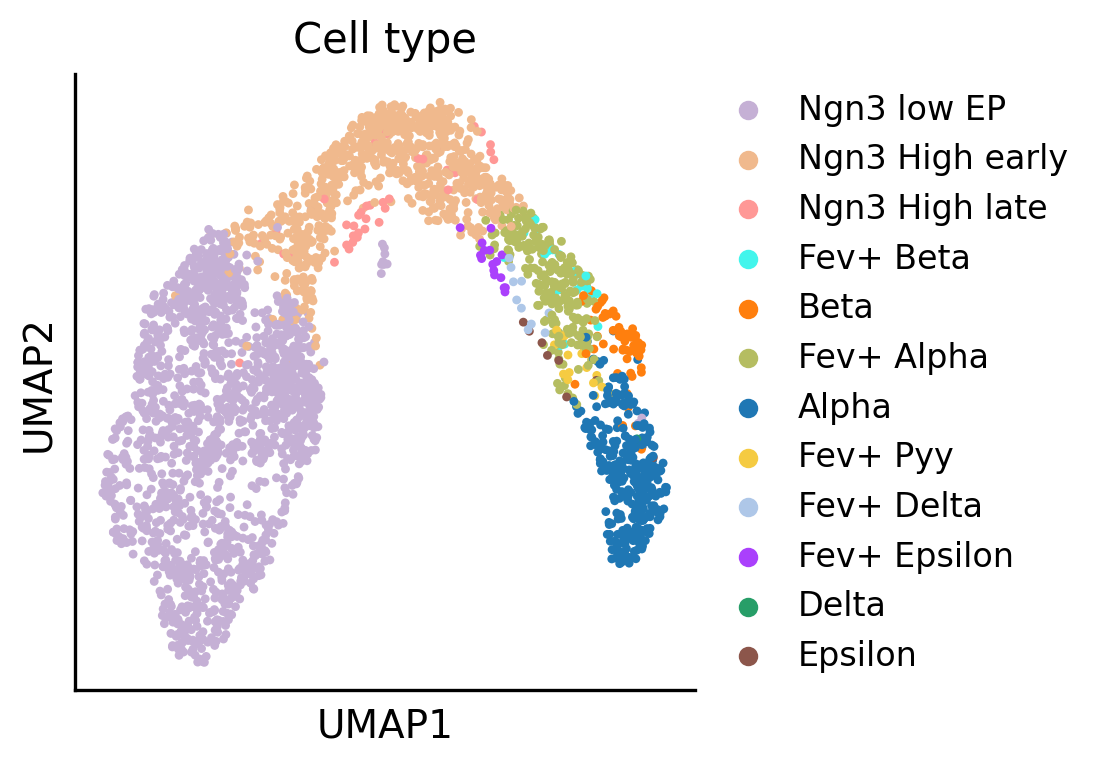

In [22]:
sc.pl.umap(bdata, color=["cell_type"], title="Cell type")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

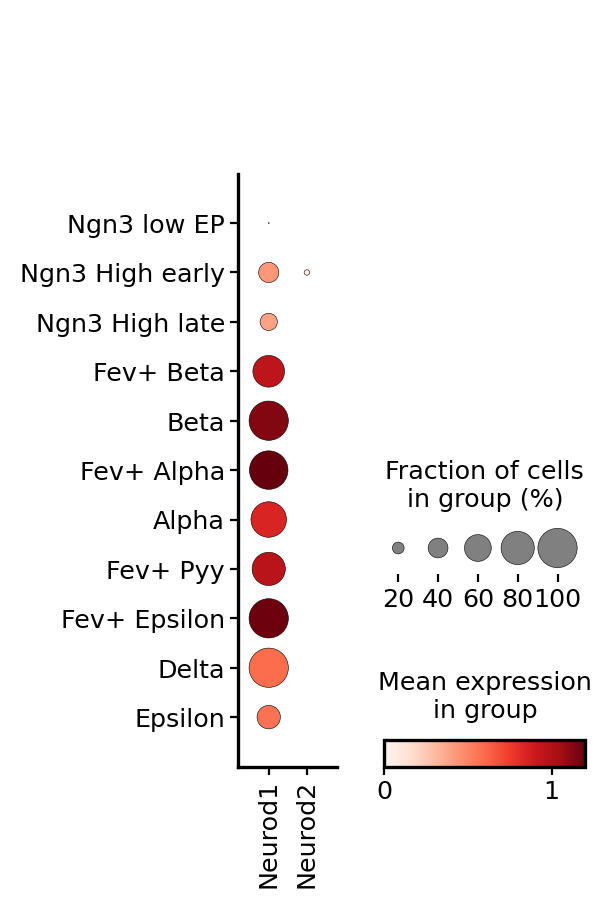

In [23]:
bdata_1 = bdata[bdata.obs["day"]=="12.5"]
sc.pl.dotplot(bdata_1, ["Neurod1", "Neurod2"], groupby='cell_type')

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

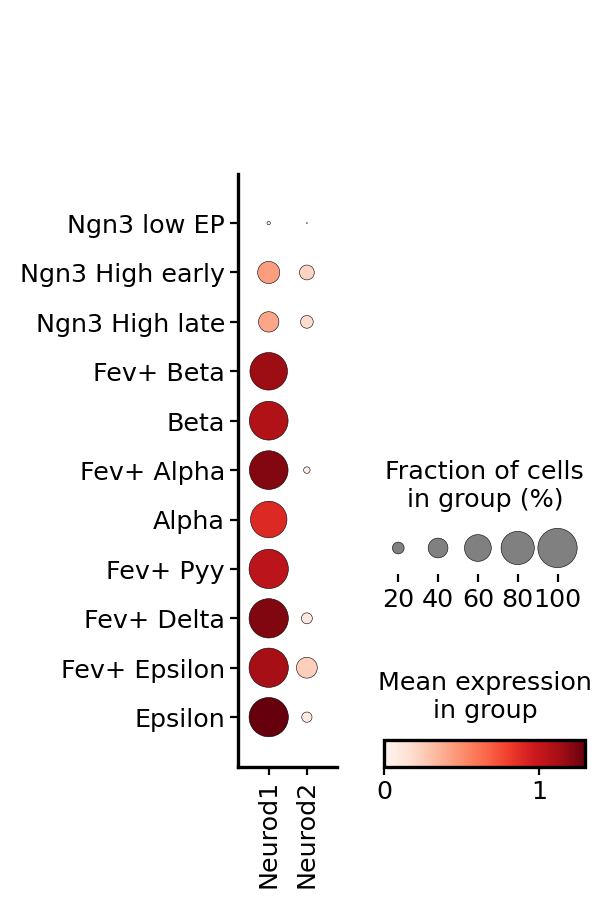

In [24]:
sc.pl.dotplot(bdata[bdata.obs["day"]=="13.5"], ["Neurod1", "Neurod2"], groupby='cell_type')

In [25]:
def filter_cell_types(adata, cell_type_column = "cell_type", min_cells=3):
    cell_type_counts = adata.obs[cell_type_column].value_counts()
    valid_cell_types = cell_type_counts[cell_type_counts >= min_cells].index
    filtered_adata = adata[adata.obs[cell_type_column].isin(valid_cell_types)].copy()
    filtered_adata.obs[cell_type_column] = filtered_adata.obs[cell_type_column].cat.remove_unused_categories()

    return filtered_adata



/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count(

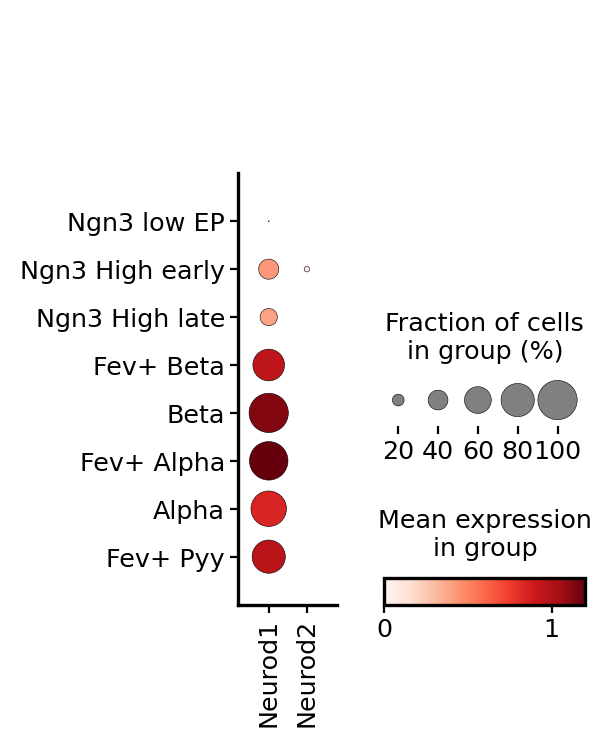

In [26]:
bdata_1 = bdata[bdata.obs["day"]=="12.5"]
bdata_1 = filter_cell_types(bdata_1)
sc.pl.dotplot(bdata_1, ["Neurod1", "Neurod2"], groupby='cell_type')

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count(

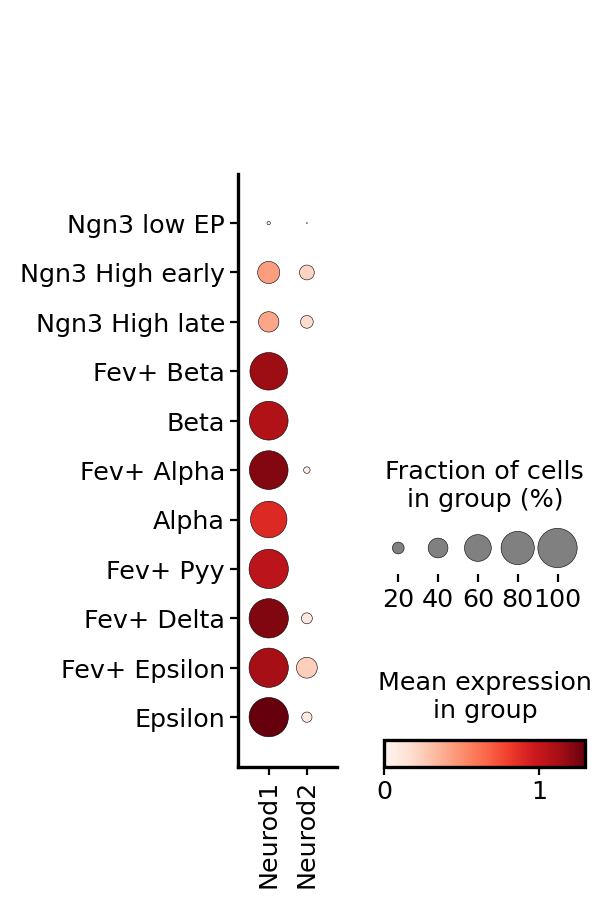

In [27]:
bdata_1 = bdata[bdata.obs["day"]=="13.5"]
bdata_1 = filter_cell_types(bdata_1)
sc.pl.dotplot(bdata_1, ["Neurod1", "Neurod2"], groupby='cell_type')

In [28]:
bdata[bdata.obs["day"]=="12.5"].obs.groupby("cell_type").count()


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_1287276/1378465856.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bdata[bdata.obs["day"]=="12.5"].obs.groupby("cell_type").count()


,day,n_counts,log_counts,n_genes,mt_frac,proliferation,G2M_score,S_score,clusters_fig3_final,clusters_fig3_final_noep,clusters_fig4_final,clusters_fig2_final,clusters_fig6_broad_final,clusters_fig6_fine_final,clusters_fig6_alpha_final
cell_type,,,,,,,,,,,,,,,
Ngn3 low EP,704,704,704,704,704,704,704,704,704,704,704,704,704,704,704
Ngn3 High early,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
Ngn3 High late,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Fev+ Beta,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Beta,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Fev+ Alpha,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Alpha,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
Fev+ Pyy,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Fev+ Epsilon,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
